In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. DATA LOADING AND INITIAL EXPLORATION
Load the preprocessed human activity dataset and examine its structure, dimensions, and basic statistics to understand the data composition.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Personal/human_activity_segmentation_project/data/processed/human_activity.csv')

In [ ]:
data.head()

subject  timestamp  activityID  heart_rate  hand_temp  hand_acc_x16  \
0  subject101      10.03           0       105.0    33.3125       1.99964   
1  subject101      10.04           0       105.0    33.3125       1.80990   
2  subject101      10.05           0       105.0    33.3125       1.82756   
3  subject101      10.06           0       105.0    33.3125       1.75760   
4  subject101      10.07           0       105.0    33.3125       1.50670   

   hand_acc_y16  hand_acc_z16  hand_acc_x6  hand_acc_y6  ...  ankle_gyro_x  \
0       6.94837       5.08845      2.62244      7.73457  ...     -0.013780   
1       6.45729       5.16424      2.19725      6.93762  ...     -0.026320   
2       5.93151       5.78208      2.01408      6.28989  ...     -0.049060   
3       5.78202       5.97397      1.83344      5.83858  ...     -0.031388   
4       6.20407       6.27669      1.71564      5.82465  ...      0.024549   

   ankle_gyro_y  ankle_gyro_z  ankle_mag_x  ankle_mag_y  ankle_mag_z  \
0      0.009471      0.003633     -43.8463     -2.97306      45.0822   
1      0.070031      0.001804     -43.8385     -2.55481      46.8195   
2     -0.002170      0.012096     -43.6100     -3.00084      46.5653   
3     -0.008545      0.007356     -43.5199     -1.99822      45.5850   
4      0.036445     -0.004679     -43.6258     -2.43575      45.5812   

   ankle_orient_w  ankle_orient_x  ankle_orient_y  ankle_orient_z  
0             1.0             0.0             0.0             0.0  
1             1.0             0.0             0.0             0.0  
2             1.0             0.0             0.0             0.0  
3             1.0             0.0             0.0             0.0  
4             1.0             0.0             0.0             0.0  

[5 rows x 55 columns]

In [ ]:
data.shape

(3850505, 55)

In [ ]:
data.describe().round(3)

timestamp   activityID   heart_rate    hand_temp  hand_acc_x16  \
count  3850505.000  3850505.000  3850504.000  3850505.000   3850505.000   
mean      1646.636        6.868      105.555       32.732        -4.114   
std       1077.869        6.883       26.425        1.948         6.084   
min          5.640        0.000       57.000       24.500      -154.609   
25%        740.290        0.000       85.000       31.625        -8.711   
50%       1495.380        4.000      102.000       33.188        -4.421   
75%       2474.060       12.000      122.000       34.125         0.154   
max       4475.630       24.000      202.000       35.500       106.034   

       hand_acc_y16  hand_acc_z16  hand_acc_x6  hand_acc_y6  hand_acc_z6  ...  \
count   3850505.000   3850505.000  3850505.000  3850505.000  3850505.000  ...   
mean          3.682         3.486       -4.036        3.679        3.670  ...   
std           6.100         4.041        6.098        5.933        4.043  ...   
min        -107.312      -118.846      -61.490      -61.876      -61.935  ...   
25%           1.292         1.133       -8.617        1.286        1.339  ...   
50%           3.684         3.209       -4.350        3.719        3.407  ...   
75%           7.031         6.445        0.251        7.040        6.699  ...   
max         157.611       157.760       62.372       62.260       61.945  ...   

       ankle_gyro_x  ankle_gyro_y  ankle_gyro_z  ankle_mag_x  ankle_mag_y  \
count   3850505.000   3850505.000   3850505.000  3850505.000  3850505.000   
mean          0.007        -0.025         0.007      -31.900        1.648   
std           1.017         0.557         1.669       19.665       21.775   
min         -29.078       -18.127       -16.474     -172.865     -140.460   
25%          -0.088        -0.057        -0.131      -42.991      -12.340   
50%           0.005        -0.004        -0.000      -32.896        0.656   
75%           0.066         0.055         0.045      -18.800       17.096   
max          24.479        13.588        19.356       97.526      123.306   

       ankle_mag_z  ankle_orient_w  ankle_orient_x  ankle_orient_y  \
count  3850505.000     3850505.000     3850505.000     3850505.000   
mean        17.275           0.430          -0.018           0.279   
std         20.726           0.326           0.559           0.323   
min       -152.323          -0.254          -0.957          -0.975   
25%          3.440           0.164          -0.622           0.000   
50%         18.727           0.337           0.000           0.238   
75%         33.141           0.633           0.566           0.573   
max        146.900           1.000           0.960           0.992   

       ankle_orient_z  
count     3850505.000  
mean           -0.042  
std             0.460  
min            -0.997  
25%            -0.512  
50%             0.000  
75%             0.413  
max             0.996  

[8 rows x 54 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850505 entries, 0 to 3850504
Data columns (total 55 columns):
 #   Column          Dtype  
---  ------          -----  
 0   subject         object 
 1   timestamp       float64
 2   activityID      int64  
 3   heart_rate      float64
 4   hand_temp       float64
 5   hand_acc_x16    float64
 6   hand_acc_y16    float64
 7   hand_acc_z16    float64
 8   hand_acc_x6     float64
 9   hand_acc_y6     float64
 10  hand_acc_z6     float64
 11  hand_gyro_x     float64
 12  hand_gyro_y     float64
 13  hand_gyro_z     float64
 14  hand_mag_x      float64
 15  hand_mag_y      float64
 16  hand_mag_z      float64
 17  hand_orient_w   float64
 18  hand_orient_x   float64
 19  hand_orient_y   float64
 20  hand_orient_z   float64
 21  chest_temp      float64
 22  chest_acc_x16   float64
 23  chest_acc_y16   float64
 24  chest_acc_z16   float64
 25  chest_acc_x6    float64
 26  chest_acc_y6    float64
 27  chest_acc_z6    float64
 28  chest_gyro_x

# 2. SUBJECT AND ACTIVITY ANALYSIS
Analyze how many activities each subject performed and their average heart rates. Also examine activity participation and intensity levels.

/tmp/ipython-input-2859347139.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(values_activities.index, rotation=45, fontsize=12)
/tmp/ipython-input-2859347139.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(values_hr.index, rotation=45, fontsize=12)


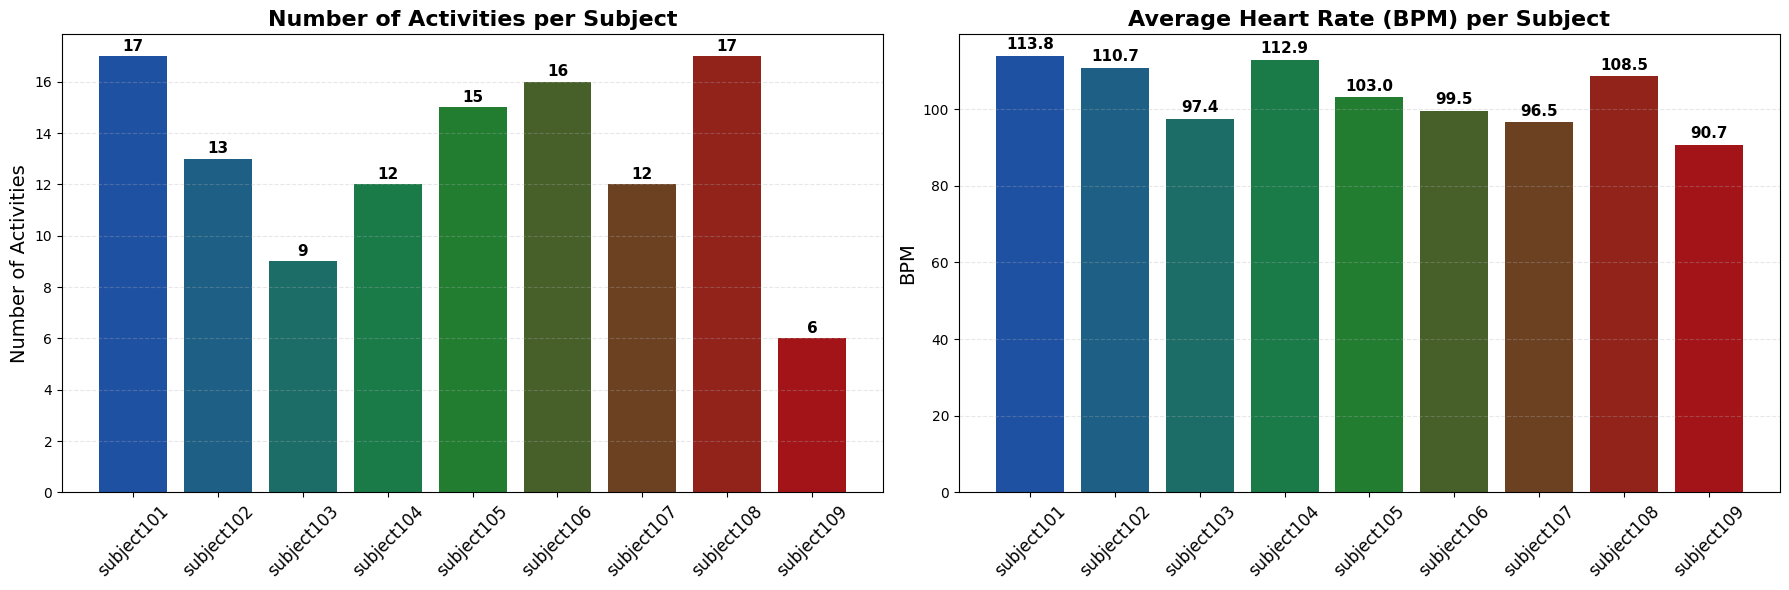

In [ ]:
base = ["#1f51a3", "#198532", "#a31418"]

cmap = LinearSegmentedColormap.from_list("custom", base, N=16)
colors_9 = [cmap(i) for i in np.linspace(0, 1, 9)]



values_activities = data.sort_values(by='subject')\
    .groupby('subject')['activityID']\
    .nunique()\

values_hr = data.groupby('subject')['heart_rate'].mean()


fig, axes = plt.subplots(1, 2, figsize=(18,6))

###fig1
bars1 = axes[0].bar(values_activities.index,
                    values_activities.values,
                    color=colors_9)

axes[0].set_title("Number of Activities per Subject",
                  fontweight='bold',
                  fontsize=16,
                  fontfamily='sans serif')

axes[0].set_ylabel("Number of Activities", fontsize=14)
axes[0].set_xticklabels(values_activities.index, rotation=45, fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f"{height}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )


###fig2
bars2 = axes[1].bar(values_hr.index,
                    values_hr.values,
                    color=colors_9)

axes[1].set_title("Average Heart Rate (BPM) per Subject",
                  fontweight='bold',
                  fontsize=16,
                  fontfamily='sans serif')

axes[1].set_ylabel("BPM", fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.3)
axes[1].set_xticklabels(values_hr.index, rotation=45, fontsize=12)

for bar in bars2:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.1f}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )



plt.tight_layout()
plt.show()

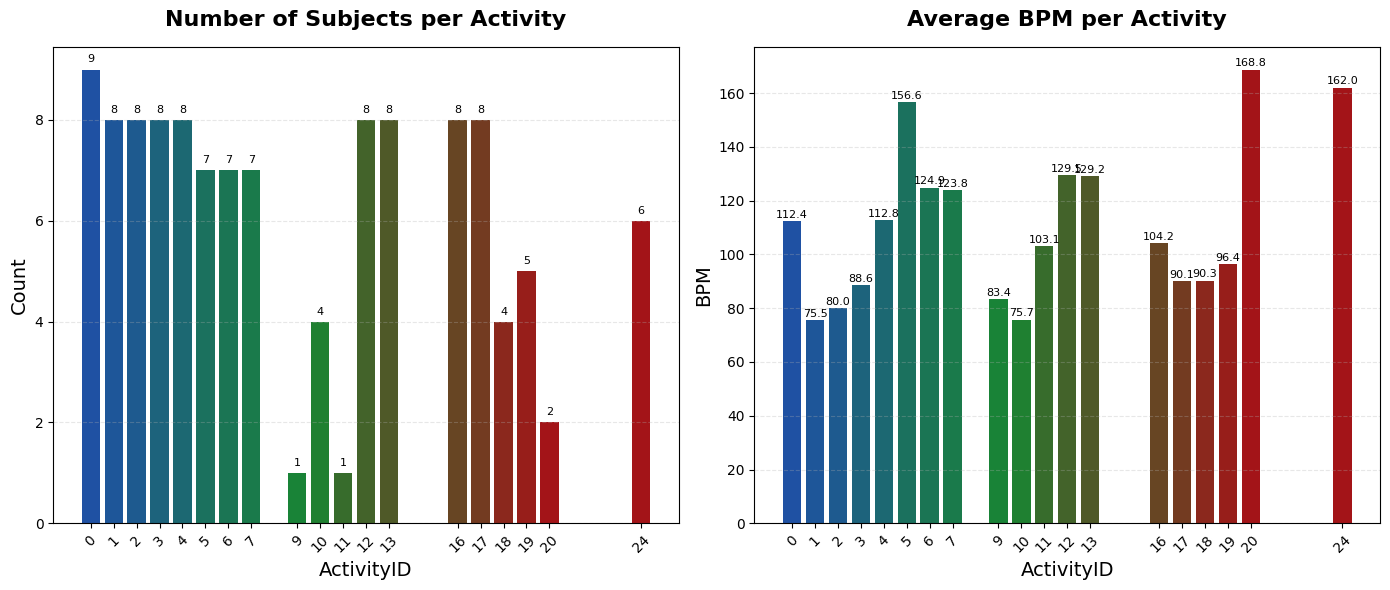

In [ ]:
cmap = LinearSegmentedColormap.from_list("custom", base, N=24)
colors_24 = [cmap(i) for i in np.linspace(0, 1.35, 24)]

activity_avg_bpm = data.groupby('activityID')['heart_rate'].mean()
activity_count = data.groupby('activityID')['subject'].nunique()

fig, axes = plt.subplots(1, 2, figsize=(14,6))


bars1 = axes[0].bar(
    activity_count.index,
    activity_count.values,
    color=colors_24
)

axes[0].set_title("Number of Subjects per Activity",
                  fontweight='bold', fontsize=16, pad=15)

axes[0].set_ylabel("Count", fontsize=14)
axes[0].set_xlabel("ActivityID", fontsize=14)

axes[0].set_xticks(activity_count.index)
axes[0].set_xticklabels(activity_count.index, rotation=45)

axes[0].grid(axis='y', linestyle='--', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 0.1,
                 f"{height:.0f}", ha='center', va='bottom', fontsize=8)


bars2 = axes[1].bar(
    activity_avg_bpm.index,
    activity_avg_bpm.values,
    color=colors_24
)

axes[1].set_title("Average BPM per Activity",
                  fontweight='bold', fontsize=16, pad=15)

axes[1].set_ylabel("BPM", fontsize=14)
axes[1].set_xlabel("ActivityID", fontsize=14)

axes[1].set_xticks(activity_avg_bpm.index)
axes[1].set_xticklabels(activity_avg_bpm.index, rotation=45)

axes[1].grid(axis='y', linestyle='--', alpha=0.3)

for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 0.5,
                 f"{height:.1f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# 3. TEMPORAL PATTERNS
Compare heart rate over time for different subjects during both vigorous (rope jumping) and sedentary (lying) activities.

In [ ]:
subset_101 = data.loc[
    (data['subject'] == 'subject101') & (data['activityID'] == 24),
    ["timestamp", "heart_rate"]
]

subset_108 = data.loc[
    (data['subject'] == 'subject108') & (data['activityID'] == 24),
    ["timestamp", "heart_rate"]
]



fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=(
        "Heart Rate Subject 101",
        "Heart Rate Subject 108"
    )
)


color_hr = "#C44E52"




fig.add_trace(
    go.Scatter(
        x=subset_101["timestamp"],
        y=subset_101["heart_rate"],
        mode="lines",
        name="Heart Rate 101",
        line=dict(color=color_hr)
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=subset_108["timestamp"],
        y=subset_108["heart_rate"],
        mode="lines",
        name="Heart Rate 108",
        line=dict(color=color_hr)
    ),
    row=1, col=2
)

fig.update_layout(
    title="Heart Rate Over Time — Activity 24",
    template="plotly_white",
    height=500,
    width=1200,
    showlegend=False,
    title_x=0.5,
    title_y=0.97,
    title_font=dict(size=24)
)

fig.update_xaxes(title_text="Time (s)", row=1, col=1)
fig.update_xaxes(title_text="Time (s)", row=1, col=2)

fig.update_yaxes(title_text="Heart Rate (BPM)", row=1, col=1)
fig.update_yaxes(title_text="Heart Rate (BPM)", row=1, col=2)

fig.show()


In [ ]:
subset_101 = data.loc[
    (data['subject'] == 'subject101') & (data['activityID'] == 1),
    ["timestamp", "heart_rate"]
]

subset_108 = data.loc[
    (data['subject'] == 'subject108') & (data['activityID'] == 1),
    ["timestamp", "heart_rate"]
]



fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=(
        "Heart Rate Subject 101",
        "Heart Rate Subject 108"
    )
)


color_hr = "#C44E52"




fig.add_trace(
    go.Scatter(
        x=subset_101["timestamp"],
        y=subset_101["heart_rate"],
        mode="lines",
        name="Heart Rate 101",
        line=dict(color=color_hr)
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=subset_108["timestamp"],
        y=subset_108["heart_rate"],
        mode="lines",
        name="Heart Rate 108",
        line=dict(color=color_hr)
    ),
    row=1, col=2
)

fig.update_layout(
    title="Heart Rate Over Time — Activity 1",
    template="plotly_white",
    height=500,
    width=1200,
    showlegend=False,
    title_x=0.5,
    title_y=0.97,
    title_font=dict(size=24)
)

fig.update_xaxes(title_text="Time (s)", row=1, col=1)
fig.update_xaxes(title_text="Time (s)", row=1, col=2)

fig.update_yaxes(title_text="Heart Rate (BPM)", row=1, col=1)
fig.update_yaxes(title_text="Heart Rate (BPM)", row=1, col=2)

fig.show()


# 4. ACTIVITY DURATION AND TRANSITIONS
Calculate how long each activity lasted per subject and analyze the amount of transitional data vs labeled activities.

In [ ]:
start_timestamp = data.groupby(['subject', 'activityID'])['timestamp']\
                      .min()\
                      .reset_index()\
                      .rename(columns={'timestamp': 'start_timestamp'})

end_timestamp = data.groupby(['subject', 'activityID'])['timestamp']\
                    .max()\
                    .reset_index()\
                    .rename(columns={'timestamp': 'end_timestamp'})

activity = pd.merge(start_timestamp, end_timestamp, on=['subject', 'activityID'])

activity['activity_duration'] = activity['end_timestamp'] - activity['start_timestamp']

total_duration_per_subject = {}
for subject in activity['subject'].unique():
  total_duration_per_subject[subject] = activity.loc[activity['subject'] == subject]['activity_duration'].sum()

total_duration_per_subject = pd.DataFrame(total_duration_per_subject.items(), columns=['subject', 'total_duration'])


total_duration_per_activity = {}
for id in activity['activityID'].unique():
  total_duration_per_activity[id] = activity.loc[activity['activityID'] == id]['activity_duration'].sum()

total_duration_per_activity = pd.DataFrame(total_duration_per_activity.items(), columns=['subject', 'total_duration'])



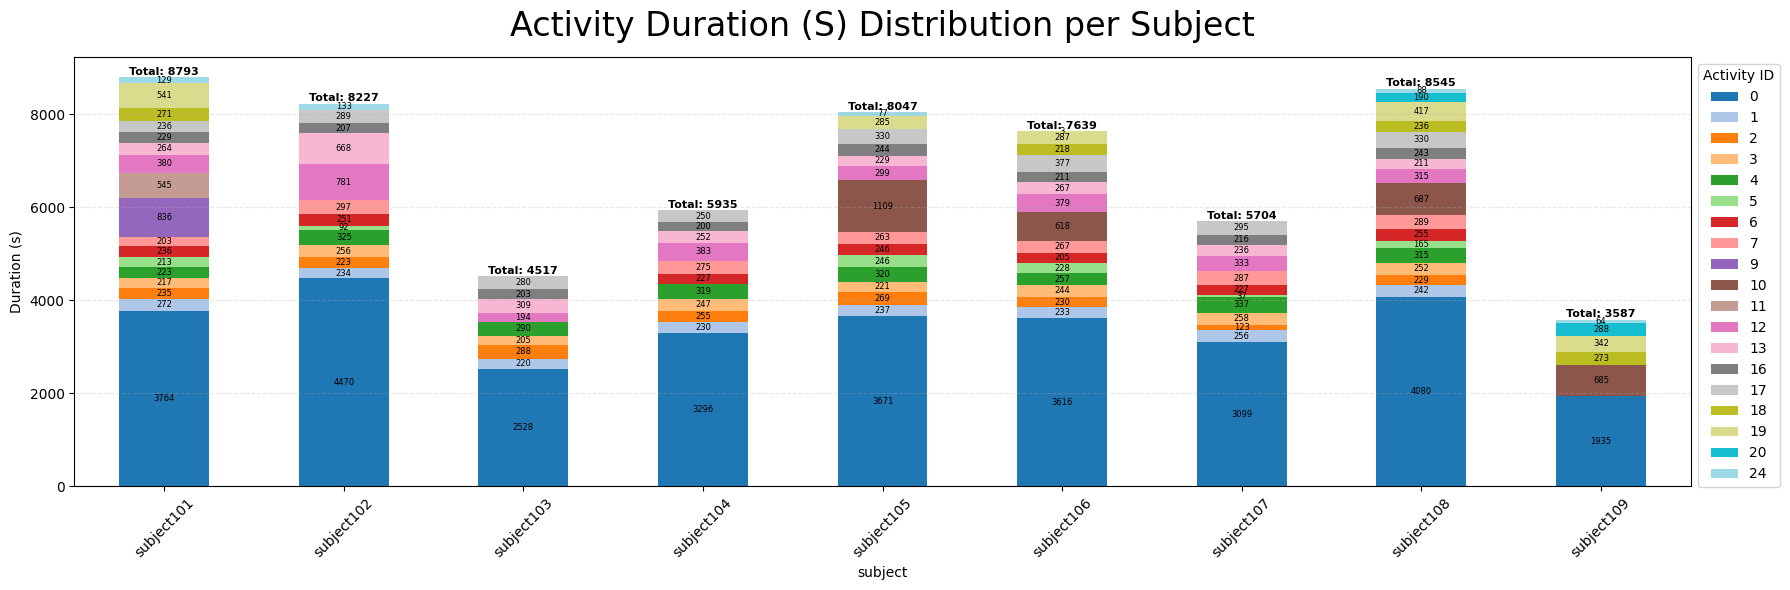

In [ ]:
subject_activity_duration = activity\
    .pivot(index='subject', columns='activityID', values='activity_duration')\
    .fillna(0)

ax = subject_activity_duration.plot(kind='bar', stacked=True, figsize=(18,6), colormap='tab20')
plt.ylabel("Duration (s)")
plt.xticks(rotation=45)
plt.title("Activity Duration (S) Distribution per Subject",
          fontsize=24,
          pad=15
          )
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Activity ID', bbox_to_anchor=(1, 1), loc='upper left', prop={'size': 10})


for i, subject in enumerate(subject_activity_duration.index):
    cumulative = 0
    for value in subject_activity_duration.loc[subject]:
        if value > 0:
            ax.text(i, cumulative + value / 2, f"{value:.0f}", ha='center', va='center', fontsize=6)
        cumulative += value

totals = subject_activity_duration.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 10, f"Total: {total:.0f}", ha='center', va='bottom', fontsize=8, fontweight='bold')



plt.tight_layout()
plt.show()


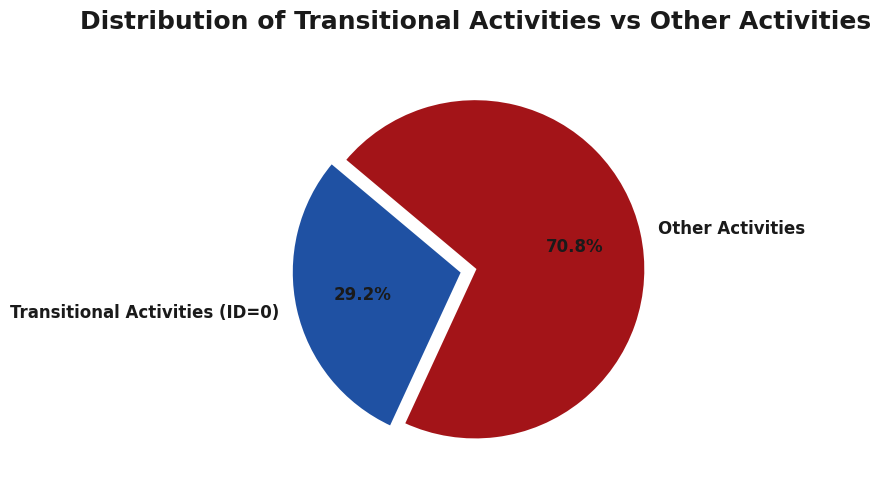

In [ ]:
transitional_count = (data['activityID'] == 0).sum()
other_count = (data['activityID'] != 0).sum()

values = [transitional_count, other_count]
labels = ["Transitional Activities (ID=0)", "Other Activities"]

colors = ["#1f51a3", "#a31418"]

explode = (0.08, 0)

plt.figure(figsize=(8, 8))

plt.pie(
    values,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct="%1.1f%%",
    startangle=140,
    textprops={"fontsize": 12, "fontweight": "bold", "color": "#1a1a1a"},
    wedgeprops={"linewidth": 1.5, "edgecolor": "white"}
)

plt.title(
    "Distribution of Transitional Activities vs Other Activities",
    fontsize=18,
    fontweight="bold",
    color="#1a1a1a",
    pad=20
)

plt.tight_layout()
plt.show()

# 5. SENSOR SIGNAL EXPLORATION
Visualize hand IMU sensor signals (acceleration, gyroscope, magnetometer) for different activities to understand movement patterns.

In [ ]:
activity_id = 1
subject = 'subject101'


subset_hand_acc16 = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_acc_x16", "hand_acc_y16", "hand_acc_z16", "timestamp"]
]

subset_hand_acc6 = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_acc_x6", "hand_acc_y6", "hand_acc_z6", "timestamp"]
]

subset_hand_gyro = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_gyro_x", "hand_gyro_y", "hand_gyro_z", "timestamp"]
]

subset_hand_mag = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_mag_x", "hand_mag_y", "hand_mag_z", "timestamp"]
]

subset_hand_orient = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_orient_w", "hand_orient_x", "hand_orient_y", "hand_orient_z","timestamp"]
]




fig = make_subplots(
    rows=3,
    cols=2,
    subplot_titles=(
        "Hand IMU Acceleration g16",
        "Hand IMU Acceleration g6",
        "Hand IMU Gyro",
        "Hand IMU Magnetometer",
        "Hand IMU Orientation"
    )
)

colors = {
    "x": "#4C72B0",
    "y": "#55A868",
    "z": "#C44E52"
}


#####

fig.add_trace(
    go.Scatter(x=subset_hand_acc16["timestamp"], y=subset_hand_acc16["hand_acc_x16"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_acc16["timestamp"], y=subset_hand_acc16["hand_acc_y16"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_acc16["timestamp"], y=subset_hand_acc16["hand_acc_z16"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=1
)

#####

fig.add_trace(
    go.Scatter(x=subset_hand_acc6["timestamp"], y=subset_hand_acc6["hand_acc_x6"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=subset_hand_acc6["timestamp"], y=subset_hand_acc6["hand_acc_y6"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=subset_hand_acc6["timestamp"], y=subset_hand_acc6["hand_acc_z6"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=2
)


#####

fig.add_trace(
    go.Scatter(x=subset_hand_gyro["timestamp"], y=subset_hand_gyro["hand_gyro_x"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_gyro["timestamp"], y=subset_hand_gyro["hand_gyro_y"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_gyro["timestamp"], y=subset_hand_gyro["hand_gyro_z"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=2, col=1
)

####

fig.add_trace(
    go.Scatter(x=subset_hand_mag["timestamp"], y=subset_hand_mag["hand_mag_x"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=subset_hand_mag["timestamp"], y=subset_hand_mag["hand_mag_y"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
   row=2, col=2
)
fig.add_trace(
    go.Scatter(x=subset_hand_mag["timestamp"], y=subset_hand_mag["hand_mag_z"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=2, col=2
)


####

fig.add_trace(
    go.Scatter(x=subset_hand_orient["timestamp"], y=subset_hand_orient["hand_orient_w"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_orient["timestamp"], y=subset_hand_orient["hand_orient_x"],
               mode='lines', name='Y-axis', line=dict(color=colors["x"])),
   row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_orient["timestamp"], y=subset_hand_orient["hand_orient_y"],
               mode='lines', name='Z-axis', line=dict(color=colors["y"])),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_orient["timestamp"], y=subset_hand_orient["hand_orient_z"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=3, col=1
)





fig.update_layout(
    template="plotly_white",
    height=800,
    width=1400,
    showlegend=False,
    title_text=f"Hand IMU Sensor Signals — {subject}, Activity {activity_id}",
    title_x=0.5,
    title_y=0.97,
    title_font=dict(size=24)

)



fig.update_xaxes(title_text="Time (s)", row=1, col=1)
fig.update_xaxes(title_text="Time (s)", row=1, col=2)
fig.update_xaxes(title_text="Time (s)", row=2, col=1)
fig.update_xaxes(title_text="Time (s)", row=2, col=2)
fig.update_xaxes(title_text="Time (s)", row=3, col=1)

fig.update_yaxes(title_text="Acceleration (m/s², ±16G)", row=1, col=1)
fig.update_yaxes(title_text="Acceleration (m/s², ±6G)", row=1, col=2)
fig.update_yaxes(title_text="Angular Velocity (°/s)", row=2, col=1)
fig.update_yaxes(title_text="Magnetic Field (µT)", row=2, col=2)
fig.update_yaxes(title_text="Orientation (unitless quaternion)", row=3, col=1)


fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
activity_id = 24
subject = 'subject101'


subset_hand_acc16 = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_acc_x16", "hand_acc_y16", "hand_acc_z16", "timestamp"]
]

subset_hand_acc6 = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_acc_x6", "hand_acc_y6", "hand_acc_z6", "timestamp"]
]

subset_hand_gyro = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_gyro_x", "hand_gyro_y", "hand_gyro_z", "timestamp"]
]

subset_hand_mag = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_mag_x", "hand_mag_y", "hand_mag_z", "timestamp"]
]

subset_hand_orient = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_orient_w", "hand_orient_x", "hand_orient_y", "hand_orient_z","timestamp"]
]




fig = make_subplots(
    rows=3,
    cols=2,
    subplot_titles=(
        "Hand IMU Acceleration g16",
        "Hand IMU Acceleration g6",
        "Hand IMU Gyro",
        "Hand IMU Magnetometer",
        "Hand IMU Orientation"
    )
)

colors = {
    "x": "#4C72B0",
    "y": "#55A868",
    "z": "#C44E52"
}


#####

fig.add_trace(
    go.Scatter(x=subset_hand_acc16["timestamp"], y=subset_hand_acc16["hand_acc_x16"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_acc16["timestamp"], y=subset_hand_acc16["hand_acc_y16"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_acc16["timestamp"], y=subset_hand_acc16["hand_acc_z16"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=1
)

#####

fig.add_trace(
    go.Scatter(x=subset_hand_acc6["timestamp"], y=subset_hand_acc6["hand_acc_x6"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=subset_hand_acc6["timestamp"], y=subset_hand_acc6["hand_acc_y6"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=subset_hand_acc6["timestamp"], y=subset_hand_acc6["hand_acc_z6"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=2
)


#####

fig.add_trace(
    go.Scatter(x=subset_hand_gyro["timestamp"], y=subset_hand_gyro["hand_gyro_x"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_gyro["timestamp"], y=subset_hand_gyro["hand_gyro_y"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_gyro["timestamp"], y=subset_hand_gyro["hand_gyro_z"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=2, col=1
)

####

fig.add_trace(
    go.Scatter(x=subset_hand_mag["timestamp"], y=subset_hand_mag["hand_mag_x"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=subset_hand_mag["timestamp"], y=subset_hand_mag["hand_mag_y"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
   row=2, col=2
)
fig.add_trace(
    go.Scatter(x=subset_hand_mag["timestamp"], y=subset_hand_mag["hand_mag_z"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=2, col=2
)


####

fig.add_trace(
    go.Scatter(x=subset_hand_orient["timestamp"], y=subset_hand_orient["hand_orient_w"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_orient["timestamp"], y=subset_hand_orient["hand_orient_x"],
               mode='lines', name='Y-axis', line=dict(color=colors["x"])),
   row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_orient["timestamp"], y=subset_hand_orient["hand_orient_y"],
               mode='lines', name='Z-axis', line=dict(color=colors["y"])),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand_orient["timestamp"], y=subset_hand_orient["hand_orient_z"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=3, col=1
)





fig.update_layout(
    template="plotly_white",
    height=800,
    width=1400,
    showlegend=False,
    title_text=f"Hand IMU Sensor Signals — {subject}, Activity {activity_id}",
    title_x=0.5,
    title_y=0.97,
    title_font=dict(size=24)

)
fig.data[0].showlegend = True
fig.data[1].showlegend = True
fig.data[2].showlegend = True



fig.update_xaxes(title_text="Time (s)", row=1, col=1)
fig.update_xaxes(title_text="Time (s)", row=1, col=2)
fig.update_xaxes(title_text="Time (s)", row=2, col=1)
fig.update_xaxes(title_text="Time (s)", row=2, col=2)
fig.update_xaxes(title_text="Time (s)", row=3, col=1)

fig.update_yaxes(title_text="Acceleration (m/s², ±16G)", row=1, col=1)
fig.update_yaxes(title_text="Acceleration (m/s², ±6G)", row=1, col=2)
fig.update_yaxes(title_text="Angular Velocity (°/s)", row=2, col=1)
fig.update_yaxes(title_text="Magnetic Field (µT)", row=2, col=2)
fig.update_yaxes(title_text="Orientation (unitless quaternion)", row=3, col=1)


fig.show()


Output hidden; open in https://colab.research.google.com to view.

# Dropping unwanted columns and transitional data

Dropping the columns for  acc-G6 and orientation since it's redundant

In [ ]:
data.columns

Index(['subject', 'timestamp', 'activityID', 'heart_rate', 'hand_temp',
       'hand_acc_x16', 'hand_acc_y16', 'hand_acc_z16', 'hand_acc_x6',
       'hand_acc_y6', 'hand_acc_z6', 'hand_gyro_x', 'hand_gyro_y',
       'hand_gyro_z', 'hand_mag_x', 'hand_mag_y', 'hand_mag_z',
       'hand_orient_w', 'hand_orient_x', 'hand_orient_y', 'hand_orient_z',
       'chest_temp', 'chest_acc_x16', 'chest_acc_y16', 'chest_acc_z16',
       'chest_acc_x6', 'chest_acc_y6', 'chest_acc_z6', 'chest_gyro_x',
       'chest_gyro_y', 'chest_gyro_z', 'chest_mag_x', 'chest_mag_y',
       'chest_mag_z', 'chest_orient_w', 'chest_orient_x', 'chest_orient_y',
       'chest_orient_z', 'ankle_temp', 'ankle_acc_x16', 'ankle_acc_y16',
       'ankle_acc_z16', 'ankle_acc_x6', 'ankle_acc_y6', 'ankle_acc_z6',
       'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z', 'ankle_mag_x',
       'ankle_mag_y', 'ankle_mag_z', 'ankle_orient_w', 'ankle_orient_x',
       'ankle_orient_y', 'ankle_orient_z'],
      dtype='object')

In [ ]:
cols_to_drop = [
    "hand_acc_x6", "hand_acc_y6", "hand_acc_z6",
    "chest_acc_x6", "chest_acc_y6", "chest_acc_z6",
    "ankle_acc_x6", "ankle_acc_y6", "ankle_acc_z6",

    "hand_orient_w", "hand_orient_x", "hand_orient_y", "hand_orient_z",
    "chest_orient_w", "chest_orient_x", "chest_orient_y", "chest_orient_z",
    "ankle_orient_w", "ankle_orient_x", "ankle_orient_y", "ankle_orient_z",
]

data_cleaned = data.drop(cols_to_drop, axis=1)

In [ ]:
data_cleaned.shape

(3850505, 34)

Removing the transitional data that is assgined to the id = 0

In [ ]:
data_cleaned = data_cleaned[~(data_cleaned['activityID'] == 0)].reset_index(drop=True)

In [ ]:
data_cleaned.shape

(2724953, 34)

# 6. MULTI-SENSOR COMPARISON
Compare the same sensors (accelerometer, gyroscope, magnetometer) across hand, chest, and ankle positions during the same activity.

In [ ]:
activity_id = 2
subject = 'subject101'



subset_hand = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_acc_x16", "hand_acc_y16", "hand_acc_z16", "timestamp"]
]

subset_chest = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["chest_acc_x16", "chest_acc_y16", "chest_acc_z16", "timestamp"]
]

subset_ankle = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["ankle_acc_x16", "ankle_acc_y16", "ankle_acc_z16", "timestamp"]
]



fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=[
        "Hand Accelerometer (±16G)",
        "Chest Accelerometer (±16G)",
        "Ankle Accelerometer (±16G)",
    ]
)

colors = {
    "x": "#4C72B0",
    "y": "#55A868",
    "z": "#C44E52"
}


fig.add_trace(
    go.Scatter(x=subset_hand["timestamp"], y=subset_hand["hand_acc_x16"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand["timestamp"], y=subset_hand["hand_acc_y16"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand["timestamp"], y=subset_hand["hand_acc_z16"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=1
)


fig.add_trace(
    go.Scatter(x=subset_chest["timestamp"], y=subset_chest["chest_acc_x16"],
               mode='lines', name='X-axis', showlegend=False,
               line=dict(color=colors["x"])),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=subset_chest["timestamp"], y=subset_chest["chest_acc_y16"],
               mode='lines', showlegend=False, line=dict(color=colors["y"])),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=subset_chest["timestamp"], y=subset_chest["chest_acc_z16"],
               mode='lines', showlegend=False, line=dict(color=colors["z"])),
    row=2, col=1
)


fig.add_trace(
    go.Scatter(x=subset_ankle["timestamp"], y=subset_ankle["ankle_acc_x16"],
               mode='lines', showlegend=False, line=dict(color=colors["x"])),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_ankle["timestamp"], y=subset_ankle["ankle_acc_y16"],
               mode='lines', showlegend=False, line=dict(color=colors["y"])),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_ankle["timestamp"], y=subset_ankle["ankle_acc_z16"],
               mode='lines', showlegend=False, line=dict(color=colors["z"])),
    row=3, col=1
)




fig.update_layout(
    template="plotly_white",
    height=900,
    width=1200,
    title_text=f"Accelerometer g16 Signals — Hand / Chest / Ankle — {subject}, Activity {activity_id}",
    title_x=0.5,
    title_y=0.97,
    title_font=dict(size=24),
)



fig.update_yaxes(title_text="Accel (m/s²)", row=1, col=1)
fig.update_yaxes(title_text="Accel (m/s²)", row=2, col=1)
fig.update_yaxes(title_text="Accel (m/s²)", row=3, col=1)

fig.update_xaxes(title_text="Time (s)", row=1, col=1)
fig.update_xaxes(title_text="Time (s)", row=2, col=1)
fig.update_xaxes(title_text="Time (s)", row=3, col=1)


fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
activity_id = 2
subject = 'subject101'

subset_hand = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_gyro_x", "hand_gyro_y", "hand_gyro_z", "timestamp"]
]

subset_chest = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["chest_gyro_x", "chest_gyro_y", "chest_gyro_z", "timestamp"]
]

subset_ankle = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z", "timestamp"]
]

fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=[
        "Hand Gyroscope (deg/s)",
        "Chest Gyroscope (deg/s)",
        "Ankle Gyroscope (deg/s)",
    ]
)

colors = {
    "x": "#4C72B0",
    "y": "#55A868",
    "z": "#C44E52"
}

fig.add_trace(
    go.Scatter(x=subset_hand["timestamp"], y=subset_hand["hand_gyro_x"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand["timestamp"], y=subset_hand["hand_gyro_y"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand["timestamp"], y=subset_hand["hand_gyro_z"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=subset_chest["timestamp"], y=subset_chest["chest_gyro_x"],
               mode='lines', name='X-axis', showlegend=False,
               line=dict(color=colors["x"])),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=subset_chest["timestamp"], y=subset_chest["chest_gyro_y"],
               mode='lines', showlegend=False, line=dict(color=colors["y"])),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=subset_chest["timestamp"], y=subset_chest["chest_gyro_z"],
               mode='lines', showlegend=False, line=dict(color=colors["z"])),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=subset_ankle["timestamp"], y=subset_ankle["ankle_gyro_x"],
               mode='lines', showlegend=False, line=dict(color=colors["x"])),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_ankle["timestamp"], y=subset_ankle["ankle_gyro_y"],
               mode='lines', showlegend=False, line=dict(color=colors["y"])),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_ankle["timestamp"], y=subset_ankle["ankle_gyro_z"],
               mode='lines', showlegend=False, line=dict(color=colors["z"])),
    row=3, col=1
)

fig.update_layout(
    template="plotly_white",
    height=900,
    width=1200,
    title_text=f"Gyroscope Signals — Hand / Chest / Ankle — {subject}, Activity {activity_id}",
    title_x=0.5,
    title_y=0.97,
    title_font=dict(size=24),
)

fig.update_yaxes(title_text="Gyro (deg/s)", row=1, col=1)
fig.update_yaxes(title_text="Gyro (deg/s)", row=2, col=1)
fig.update_yaxes(title_text="Gyro (deg/s)", row=3, col=1)

fig.update_xaxes(title_text="Time (s)", row=1, col=1)
fig.update_xaxes(title_text="Time (s)", row=2, col=1)
fig.update_xaxes(title_text="Time (s)", row=3, col=1)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
activity_id = 2
subject = 'subject101'

subset_hand = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["hand_mag_x", "hand_mag_y", "hand_mag_z", "timestamp"]
]

subset_chest = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["chest_mag_x", "chest_mag_y", "chest_mag_z", "timestamp"]
]

subset_ankle = data.loc[
    (data['subject'] == subject) & (data['activityID'] == activity_id),
    ["ankle_mag_x", "ankle_mag_y", "ankle_mag_z", "timestamp"]
]

fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=[
        "Hand Magnetometer",
        "Chest Magnetometer",
        "Ankle Magnetometer",
    ]
)

colors = {
    "x": "#4C72B0",
    "y": "#55A868",
    "z": "#C44E52"
}

fig.add_trace(
    go.Scatter(x=subset_hand["timestamp"], y=subset_hand["hand_mag_x"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand["timestamp"], y=subset_hand["hand_mag_y"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_hand["timestamp"], y=subset_hand["hand_mag_z"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=subset_chest["timestamp"], y=subset_chest["chest_mag_x"],
               mode='lines', name='X-axis', showlegend=False,
               line=dict(color=colors["x"])),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=subset_chest["timestamp"], y=subset_chest["chest_mag_y"],
               mode='lines', showlegend=False, line=dict(color=colors["y"])),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=subset_chest["timestamp"], y=subset_chest["chest_mag_z"],
               mode='lines', showlegend=False, line=dict(color=colors["z"])),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=subset_ankle["timestamp"], y=subset_ankle["ankle_mag_x"],
               mode='lines', showlegend=False, line=dict(color=colors["x"])),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_ankle["timestamp"], y=subset_ankle["ankle_mag_y"],
               mode='lines', showlegend=False, line=dict(color=colors["y"])),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=subset_ankle["timestamp"], y=subset_ankle["ankle_mag_z"],
               mode='lines', showlegend=False, line=dict(color=colors["z"])),
    row=3, col=1
)

fig.update_layout(
    template="plotly_white",
    height=900,
    width=1200,
    title_text=f"Magnetic Field Signals — Hand / Chest / Ankle — {subject}, Activity {activity_id}",
    title_x=0.5,
    title_y=0.97,
    title_font=dict(size=24),
)

fig.update_yaxes(title_text="Magnetic Field (µT)", row=1, col=1)
fig.update_yaxes(title_text="Magnetic Field (µT)", row=2, col=1)
fig.update_yaxes(title_text="Magnetic Field (µT)", row=3, col=1)

fig.update_xaxes(title_text="Time (s)", row=1, col=1)
fig.update_xaxes(title_text="Time (s)", row=2, col=1)
fig.update_xaxes(title_text="Time (s)", row=3, col=1)

fig.show()


Output hidden; open in https://colab.research.google.com to view.

# 7. CROSS-SUBJECT COMPARISON
Compare sensor signals from different subjects performing the same activities to check for consistency.

In [ ]:
activity_id = 1

subset_108 = data.loc[
    (data['subject'] == 'subject108') & (data['activityID'] == activity_id),
    ["chest_temp", "chest_acc_x16", "chest_acc_y16", "chest_acc_z16", "timestamp"]
]


subset_101 = data.loc[
    (data['subject'] == 'subject101') & (data['activityID'] == activity_id),
    ["chest_temp","chest_acc_x16", "chest_acc_y16", "chest_acc_z16", "timestamp"]
]


fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=(
        f"Chest IMU Acceleration (Subject 108, Activity {activity_id})",
        f"Chest IMU Acceleration (Subject 101, Activity {activity_id})"
    )
)

colors = {
    "x": "#4C72B0",
    "y": "#55A868",
    "z": "#C44E52",
    "temp":"#FFA500"
}


fig.add_trace(
    go.Scatter(x=subset_108["timestamp"], y=subset_108["chest_acc_x16"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_108["timestamp"], y=subset_108["chest_acc_y16"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_108["timestamp"], y=subset_108["chest_acc_z16"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=1
)


fig.add_trace(
    go.Scatter(x=subset_101["timestamp"], y=subset_101["chest_acc_x16"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=subset_101["timestamp"], y=subset_101["chest_acc_y16"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=subset_101["timestamp"], y=subset_101["chest_acc_z16"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=2
)



fig.update_layout(
    template="plotly_white",
    height=500,
    width=1200,
    showlegend=True,
)

fig.update_xaxes(title_text="Time (s)", row=1, col=1)
fig.update_xaxes(title_text="Time (s)", row=1, col=2)

fig.update_yaxes(title_text="Acceleration (ms⁻²)", row=1, col=1)
fig.update_yaxes(title_text="Acceleration (ms⁻²)", row=1, col=2)

fig.show()


In [ ]:
activity_id = 4

subset_108 = data.loc[
    (data['subject'] == 'subject108') & (data['activityID'] == activity_id),
    ["hand_acc_x16", "hand_acc_y16", "hand_acc_z16", "timestamp"]
]

subset_101 = data.loc[
    (data['subject'] == 'subject101') & (data['activityID'] == activity_id),
    ["hand_acc_x16", "hand_acc_y16", "hand_acc_z16", "timestamp"]
]

fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=(
        f"Hand IMU Acceleration (Subject 108, Activity {activity_id})",
        f"Hand IMU Acceleration (Subject 101, Activity {activity_id})"
    )
)

colors = {
    "x": "#4C72B0",
    "y": "#55A868",
    "z": "#C44E52"
}

fig.add_trace(
    go.Scatter(x=subset_108["timestamp"], y=subset_108["hand_acc_x16"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_108["timestamp"], y=subset_108["hand_acc_y16"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_108["timestamp"], y=subset_108["hand_acc_z16"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=subset_101["timestamp"], y=subset_101["hand_acc_x16"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=subset_101["timestamp"], y=subset_101["hand_acc_y16"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=subset_101["timestamp"], y=subset_101["hand_acc_z16"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=2
)

fig.update_layout(
    template="plotly_white",
    height=500,
    width=1200,
    showlegend=True,
)

fig.update_xaxes(title_text="Time (s)", row=1, col=1)
fig.update_xaxes(title_text="Time (s)", row=1, col=2)

fig.update_yaxes(title_text="Acceleration (ms⁻²)", row=1, col=1)
fig.update_yaxes(title_text="Acceleration (ms⁻²)", row=1, col=2)

fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
activity_id = 6

subset_108 = data.loc[
    (data['subject'] == 'subject108') & (data['activityID'] == activity_id),
    ["ankle_acc_x16", "ankle_acc_y16", "ankle_acc_z16", "timestamp"]
]

subset_101 = data.loc[
    (data['subject'] == 'subject101') & (data['activityID'] == activity_id),
    ["ankle_acc_x16", "ankle_acc_y16", "ankle_acc_z16", "timestamp"]
]

fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=(
        f"Ankle IMU Acceleration (Subject 108, Activity {activity_id})",
        f"Ankle IMU Acceleration (Subject 101, Activity {activity_id})"
    )
)

colors = {
    "x": "#4C72B0",
    "y": "#55A868",
    "z": "#C44E52"
}

fig.add_trace(
    go.Scatter(x=subset_108["timestamp"], y=subset_108["ankle_acc_x16"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_108["timestamp"], y=subset_108["ankle_acc_y16"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=subset_108["timestamp"], y=subset_108["ankle_acc_z16"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=subset_101["timestamp"], y=subset_101["ankle_acc_x16"],
               mode='lines', name='X-axis', line=dict(color=colors["x"])),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=subset_101["timestamp"], y=subset_101["ankle_acc_y16"],
               mode='lines', name='Y-axis', line=dict(color=colors["y"])),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=subset_101["timestamp"], y=subset_101["ankle_acc_z16"],
               mode='lines', name='Z-axis', line=dict(color=colors["z"])),
    row=1, col=2
)

fig.update_layout(
    template="plotly_white",
    height=500,
    width=1200,
    showlegend=True,
)

fig.update_xaxes(title_text="Time (s)", row=1, col=1)
fig.update_xaxes(title_text="Time (s)", row=1, col=2)

fig.update_yaxes(title_text="Acceleration (ms⁻²)", row=1, col=1)
fig.update_yaxes(title_text="Acceleration (ms⁻²)", row=1, col=2)

fig.show()


# 8. FEATURE ANALYSIS AND CLEANING
Analyze feature correlations, create radar charts for acceleration patterns, then remove redundant features and transitional data to prepare for modeling.

/tmp/ipython-input-714485020.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



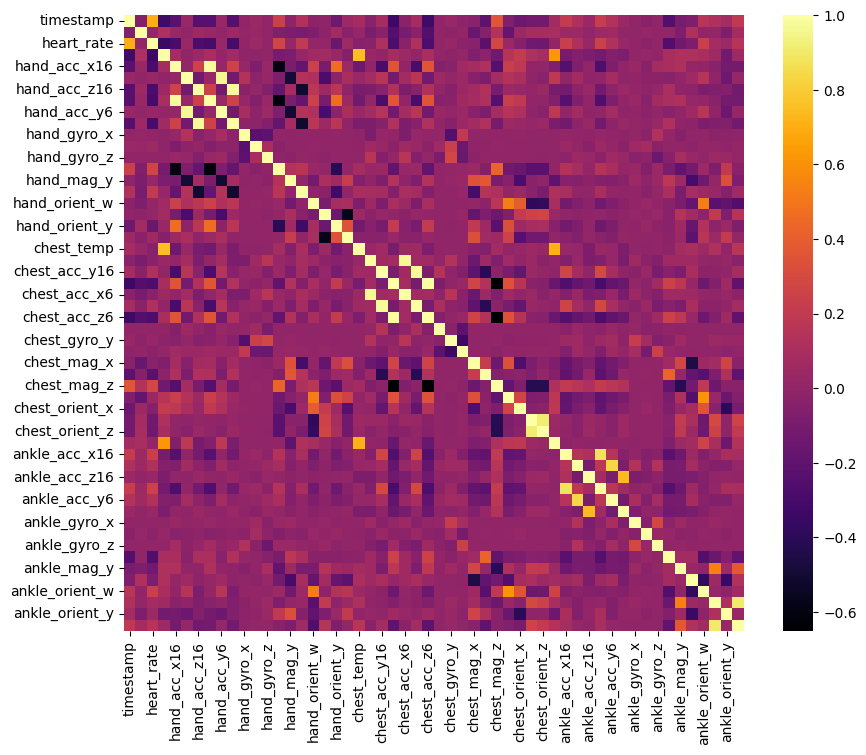

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(['subject'], axis=1).corr(), cmap='inferno')

ax.set_xticklabels(ax.get_xticklabels(), fontsize=2)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=2)

plt.show()

# 9. EXPORITNG THE CLEANED DATA

In [ ]:
data_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/Personal/human_activity_segmentation_project/data/processed/model_ready.csv', index=False)